In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Holiday_Package.csv')

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [7]:
df_cat=df.select_dtypes(object)

In [8]:
df_num=df.select_dtypes([int,float])

In [9]:
df_cat

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no
...,...,...
867,no,yes
868,yes,yes
869,no,yes
870,yes,yes


In [10]:
df_num

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2
...,...,...,...,...,...
867,40030,24,4,2,1
868,32137,48,8,0,0
869,25178,24,6,2,0
870,55958,41,10,0,1


In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [12]:
df_cat

,Holliday_Package,foreign
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
867,0,1
868,1,1
869,0,1
870,1,1


In [13]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [14]:
df_new

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package,foreign
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0
...,...,...,...,...,...,...,...
867,40030,24,4,2,1,0,1
868,32137,48,8,0,0,1,1
869,25178,24,6,2,0,0,1
870,55958,41,10,0,1,1,1


In [15]:
#splitting into x and y
x=df_new.drop('Holliday_Package',axis=1)

In [16]:
x

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0
...,...,...,...,...,...,...
867,40030,24,4,2,1,1
868,32137,48,8,0,0,1
869,25178,24,6,2,0,1
870,55958,41,10,0,1,1


In [17]:
y=df_new['Holliday_Package']

In [18]:
y

0      0
1      1
2      0
3      0
4      0
      ..
867    0
868    1
869    0
870    1
871    0
Name: Holliday_Package, Length: 872, dtype: int32

In [19]:
#split a data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [20]:
#build model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [21]:
#evaluate a mdodel
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



In [22]:
#hypertuning using solver parameter
logreg=LogisticRegression(solver="liblinear")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.43      0.10      0.17       117

    accuracy                           0.54       262
   macro avg       0.49      0.50      0.42       262
weighted avg       0.50      0.54      0.45       262



In [23]:
xtest

,Salary,age,educ,no_young_children,no_older_children,foreign
523,74580,29,13,1,0,0
731,36564,47,5,0,1,1
180,40635,24,8,2,0,0
185,124627,32,13,2,1,0
435,28158,40,9,0,6,0
...,...,...,...,...,...,...
855,106302,47,13,0,0,1
76,50291,34,10,0,2,0
857,56718,33,14,0,2,1
856,49318,31,16,2,0,1


In [24]:
ypredprob=logreg.predict_proba(xtest)[:,1]

In [25]:
ypredprob

array([0.37128101, 0.4817956 , 0.44049153, 0.26916978, 0.49715001,
       0.41583298, 0.30640111, 0.45161947, 0.31935128, 0.43060903,
       0.41738287, 0.40892077, 0.39090033, 0.49516052, 0.50141858,
       0.49227233, 0.48887581, 0.3882989 , 0.49928149, 0.39891433,
       0.50860588, 0.45833636, 0.43205269, 0.50095658, 0.49556748,
       0.4652921 , 0.42486007, 0.46385974, 0.47526293, 0.45551125,
       0.46120301, 0.46336486, 0.50046773, 0.46175524, 0.45216981,
       0.50561614, 0.45305223, 0.44579982, 0.4604662 , 0.44435902,
       0.44896969, 0.46233581, 0.45381575, 0.48017313, 0.50364429,
       0.44894833, 0.49187127, 0.49704789, 0.5187296 , 0.4818702 ,
       0.46474611, 0.46002012, 0.44967651, 0.45271001, 0.46471341,
       0.24886435, 0.45779796, 0.44260986, 0.43433989, 0.51857776,
       0.46857236, 0.34712408, 0.2638722 , 0.4414813 , 0.46438372,
       0.47278457, 0.50852534, 0.43870261, 0.49358681, 0.36839259,
       0.44831049, 0.44956938, 0.40046304, 0.34833996, 0.45565

In [26]:
from sklearn.preprocessing import binarize

In [27]:
ypred=binarize([ypredprob],threshold=0.30)[0]   #2D--> 1D
ypred

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [28]:
print(f'Actual Values   :  {ytest[:25].values}')
print(f"Predicted Values:  {ypred[:25].astype(int)}")

Actual Values   :  [1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1]
Predicted Values:  [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(ytest,ypredprob)

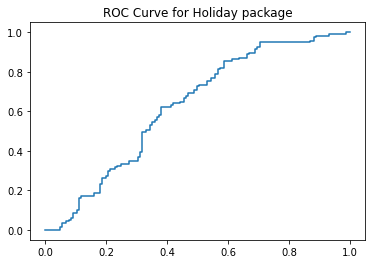

In [30]:
plt.plot(fpr,tpr)
plt.title('ROC Curve for Holiday package')
plt.show()